In [1]:
import bnlearn as bn
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# Load example mixed dataset
df = bn.import_example(data='titanic')

[bnlearn] >Import dataset..


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random

2022-10-28 20:33:18.483741: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-28 20:33:18.483791: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
dfhot, dfnum = bn.df2onehot(df)


[df2onehot] >Auto detecting dtypes.


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 298.73it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 296.93it/s]

[df2onehot] >Total onehot features: 19


In [4]:
dfnum_0 = dfnum

In [13]:
dfnum = dfnum[[ 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Cabin', 'Embarked']]

In [14]:
# This is the dimension of the original space
input_dim = 8

# This is the dimension of the latent space (encoding space)
latent_dim = 2

encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim, activation=None)
])

In [15]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='Adam')

In [19]:
model_history = autoencoder.fit(dfnum,
                                dfnum, 
                                epochs=256*2, batch_size=32, verbose=1)


Epoch 1/512
28/28 [==============================] - 0s 6ms/step - loss: 2422.8552
Epoch 2/512
28/28 [==============================] - 0s 5ms/step - loss: 2500.5378
Epoch 3/512
28/28 [==============================] - 0s 5ms/step - loss: 2415.5669
Epoch 4/512
28/28 [==============================] - 0s 5ms/step - loss: 2206.4692
Epoch 5/512
28/28 [==============================] - 0s 5ms/step - loss: 2413.5303
Epoch 6/512
28/28 [==============================] - 0s 5ms/step - loss: 2316.9451
Epoch 7/512
28/28 [==============================] - 0s 3ms/step - loss: 2493.3193
Epoch 8/512
28/28 [==============================] - 0s 2ms/step - loss: 2477.3591
Epoch 9/512
28/28 [==============================] - 0s 2ms/step - loss: 1976.7705
Epoch 10/512
28/28 [==============================] - 0s 3ms/step - loss: 2083.1670
Epoch 11/512
28/28 [==============================] - 0s 2ms/step - loss: 2198.9036
Epoch 12/512
28/28 [==============================] - 0s 3ms/step - loss: 2135.6826
E

28/28 [==============================] - 0s 3ms/step - loss: 2096.0530
Epoch 99/512
28/28 [==============================] - 0s 3ms/step - loss: 2020.5867
Epoch 100/512
28/28 [==============================] - 0s 3ms/step - loss: 2386.4172
Epoch 101/512
28/28 [==============================] - 0s 3ms/step - loss: 1979.6447
Epoch 102/512
28/28 [==============================] - 0s 3ms/step - loss: 1867.3083
Epoch 103/512
28/28 [==============================] - 0s 3ms/step - loss: 2038.6248
Epoch 104/512
28/28 [==============================] - 0s 2ms/step - loss: 1840.4836
Epoch 105/512
28/28 [==============================] - 0s 3ms/step - loss: 1849.1604
Epoch 106/512
28/28 [==============================] - 0s 2ms/step - loss: 2225.1021
Epoch 107/512
28/28 [==============================] - 0s 2ms/step - loss: 1941.7845
Epoch 108/512
28/28 [==============================] - 0s 3ms/step - loss: 1911.7120
Epoch 109/512
28/28 [==============================] - 0s 2ms/step - loss: 1849.

28/28 [==============================] - 0s 3ms/step - loss: 1867.6223
Epoch 195/512
28/28 [==============================] - 0s 5ms/step - loss: 1870.1899
Epoch 196/512
28/28 [==============================] - 0s 5ms/step - loss: 1987.8810
Epoch 197/512
28/28 [==============================] - 0s 5ms/step - loss: 1918.2720
Epoch 198/512
28/28 [==============================] - 0s 5ms/step - loss: 1937.2954
Epoch 199/512
28/28 [==============================] - 0s 5ms/step - loss: 1930.2557
Epoch 200/512
28/28 [==============================] - 0s 5ms/step - loss: 2211.7393
Epoch 201/512
28/28 [==============================] - 0s 6ms/step - loss: 2364.9207
Epoch 202/512
28/28 [==============================] - 0s 3ms/step - loss: 1913.9398
Epoch 203/512
28/28 [==============================] - 0s 2ms/step - loss: 2090.1208
Epoch 204/512
28/28 [==============================] - 0s 3ms/step - loss: 1900.6708
Epoch 205/512
28/28 [==============================] - 0s 2ms/step - loss: 1749

28/28 [==============================] - 0s 3ms/step - loss: 1872.5896
Epoch 291/512
28/28 [==============================] - 0s 3ms/step - loss: 2023.6724
Epoch 292/512
28/28 [==============================] - 0s 2ms/step - loss: 2208.9402
Epoch 293/512
28/28 [==============================] - 0s 2ms/step - loss: 2056.7297
Epoch 294/512
28/28 [==============================] - 0s 3ms/step - loss: 1903.5312
Epoch 295/512
28/28 [==============================] - 0s 3ms/step - loss: 1840.1790
Epoch 296/512
28/28 [==============================] - 0s 3ms/step - loss: 1714.3076
Epoch 297/512
28/28 [==============================] - 0s 3ms/step - loss: 1653.6425
Epoch 298/512
28/28 [==============================] - 0s 2ms/step - loss: 1556.2026
Epoch 299/512
28/28 [==============================] - 0s 2ms/step - loss: 1584.4044
Epoch 300/512
28/28 [==============================] - 0s 3ms/step - loss: 1645.3743
Epoch 301/512
28/28 [==============================] - 0s 2ms/step - loss: 1741

28/28 [==============================] - 0s 3ms/step - loss: 2498.8933
Epoch 387/512
28/28 [==============================] - 0s 3ms/step - loss: 2562.0371
Epoch 388/512
28/28 [==============================] - 0s 2ms/step - loss: 2678.9526
Epoch 389/512
28/28 [==============================] - 0s 3ms/step - loss: 2383.4368
Epoch 390/512
28/28 [==============================] - 0s 3ms/step - loss: 2482.5259
Epoch 391/512
28/28 [==============================] - 0s 3ms/step - loss: 2335.5627
Epoch 392/512
28/28 [==============================] - 0s 3ms/step - loss: 2736.9229
Epoch 393/512
28/28 [==============================] - 0s 3ms/step - loss: 2713.9324
Epoch 394/512
28/28 [==============================] - 0s 3ms/step - loss: 2537.6790
Epoch 395/512
28/28 [==============================] - 0s 3ms/step - loss: 2552.3528
Epoch 396/512
28/28 [==============================] - 0s 3ms/step - loss: 2811.6731
Epoch 397/512
28/28 [==============================] - 0s 3ms/step - loss: 2419

28/28 [==============================] - 0s 2ms/step - loss: 2012.9806
Epoch 483/512
28/28 [==============================] - 0s 2ms/step - loss: 1814.8807
Epoch 484/512
28/28 [==============================] - 0s 2ms/step - loss: 2220.6284
Epoch 485/512
28/28 [==============================] - 0s 2ms/step - loss: 2331.0366
Epoch 486/512
28/28 [==============================] - 0s 2ms/step - loss: 2182.4753
Epoch 487/512
28/28 [==============================] - 0s 2ms/step - loss: 2079.7371
Epoch 488/512
28/28 [==============================] - 0s 2ms/step - loss: 2253.7583
Epoch 489/512
28/28 [==============================] - 0s 2ms/step - loss: 2497.1826
Epoch 490/512
28/28 [==============================] - 0s 2ms/step - loss: 2492.0774
Epoch 491/512
28/28 [==============================] - 0s 3ms/step - loss: 1814.5748
Epoch 492/512
28/28 [==============================] - 0s 3ms/step - loss: 1785.2250
Epoch 493/512
28/28 [==============================] - 0s 3ms/step - loss: 2042

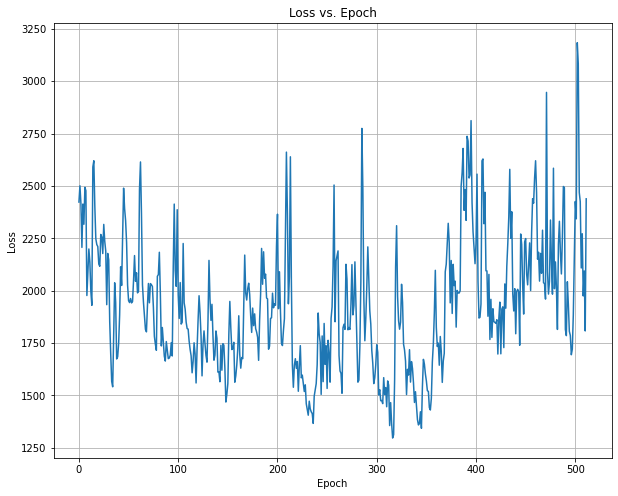

In [20]:
fig = plt.figure(figsize=(10,8))
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

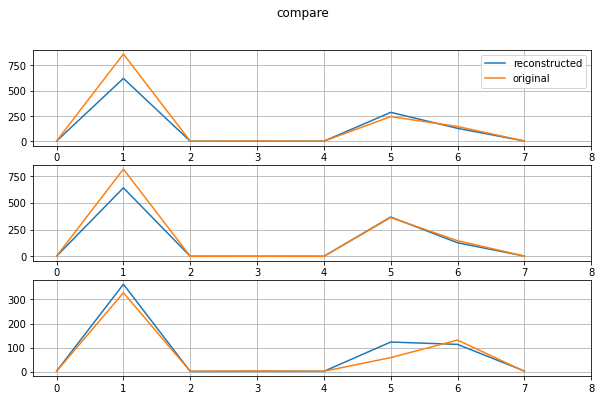

In [18]:
fig = plt.figure(figsize=(10,6))
plt.suptitle('compare')
for i in range(3):
    plt.subplot(3, 1, i+1)
    idx = random.sample(range(dfnum.shape[0]), 1)
    plt.plot(autoencoder.predict(dfnum.values[idx]).squeeze(), label='reconstructed' if i == 0 else '')
    plt.plot(dfnum.values[idx].squeeze(), label='original' if i == 0 else '')
    #fig.axes[i].set_xticklabels(metric_names)
    plt.xticks(np.arange(0, 9, 1))
    plt.grid(True)
    if i == 0: plt.legend();

In [21]:
encoder_result = encoder(dfnum.values)

In [22]:
encoder_result

<tf.Tensor: shape=(891, 2), dtype=float32, numpy=
array([[2.664372 , 0.       ],
       [5.4685817, 0.       ],
       [5.4324884, 0.       ],
       ...,
       [5.88321  , 0.       ],
       [0.       , 0.       ],
       [9.486527 , 0.       ]], dtype=float32)>

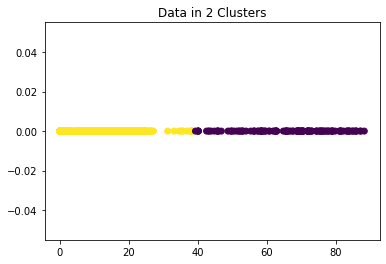

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plotlib
number_of_clusters = 2
y_pred = KMeans(n_clusters=number_of_clusters).fit_predict(encoder_result)

# Plot the clustered data points.
plotlib.scatter(encoder_result[:, 0], encoder_result[:, 1], c=y_pred)
plotlib.title("Data in " + str(number_of_clusters) + " Clusters")

# Display the plot.
plotlib.show()

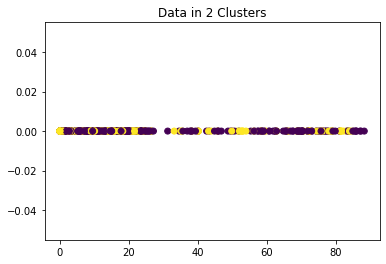

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plotlib
number_of_clusters = 2
y_pred = KMeans(n_clusters=number_of_clusters).fit_predict(encoder_result)

# Plot the clustered data points.
plotlib.scatter(encoder_result[:, 0], encoder_result[:, 1], c=dfnum_0['Survived'])
plotlib.title("Data in " + str(number_of_clusters) + " Clusters")

# Display the plot.
plotlib.show()